# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaca (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins= True).rename(
                           index = {0 : 'Masculino', 1 : 'Feminino', 'All': 'Total'}
                          ,columns= {0 : 'Saudavel', 1 : 'Doente', 'All': 'Total'})
tab_sex

flag_doente,Saudavel,Doente,Total
sex,,,
Masculino,72,25,97
Feminino,92,114,206
Total,164,139,303


In [5]:
tab_sex['Media de Doentes'] = tab_sex['Total']/tab_sex['Doente']
tab_sex

flag_doente,Saudavel,Doente,Total,Media de Doentes
sex,,,,
Masculino,72,25,97,3.880000
Feminino,92,114,206,1.807018
Total,164,139,303,2.179856


In [6]:
tab_sex['Chance'] = tab_sex['Doente']/tab_sex['Saudavel']
tab_sex

flag_doente,Saudavel,Doente,Total,Media de Doentes,Chance
sex,,,,,
Masculino,72,25,97,3.880000,0.347222
Feminino,92,114,206,1.807018,1.239130
Total,164,139,303,2.179856,0.847561


In [7]:
tab_sex['RP_x_Total'] = tab_sex['Chance']/tab_sex.loc['Total','Chance']
tab_sex

flag_doente,Saudavel,Doente,Total,Media de Doentes,Chance,RP_x_Total
sex,,,,,,
Masculino,72,25,97,3.880000,0.347222,0.409672
Feminino,92,114,206,1.807018,1.239130,1.461996
Total,164,139,303,2.179856,0.847561,1.000000


In [8]:
tab_sex['Logito'] = np.log(tab_sex['Chance'])
tab_sex

flag_doente,Saudavel,Doente,Total,Media de Doentes,Chance,RP_x_Total,Logito
sex,,,,,,,
Masculino,72,25,97,3.880000,0.347222,0.409672,-1.057790
Feminino,92,114,206,1.807018,1.239130,1.461996,0.214410
Total,164,139,303,2.179856,0.847561,1.000000,-0.165392


In [9]:
tab_sex['WOE'] = np.log(tab_sex['RP_x_Total'])
tab_sex

flag_doente,Saudavel,Doente,Total,Media de Doentes,Chance,RP_x_Total,Logito,WOE
sex,,,,,,,,
Masculino,72,25,97,3.880000,0.347222,0.409672,-1.057790,-0.892398
Feminino,92,114,206,1.807018,1.239130,1.461996,0.214410,0.379802
Total,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [10]:
bins = [0, 40, 50, 60, 70, 100]
labels = ['<40', '40-49', '50-59', '60-69', '70+']
df['faixa_etaria'] = pd.cut(df['age'], bins=bins, labels=labels)

In [11]:
tab_age = pd.crosstab(df['faixa_etaria'], df['flag_doente'], margins= True).rename(columns= 
                                                                          {0 : 'Saudavel', 1 : 'Doente', 'All': 'Total'})
tab_age.head(5)

flag_doente,Saudavel,Doente,Total
faixa_etaria,,,
<40,12,6,18
40-49,53,23,76
50-59,64,66,130
60-69,30,43,73
70+,5,1,6


In [23]:
tab_age['media_idade_por_grupo'] = df.groupby('faixa_etaria')['age'].mean()
tab_age['Media de Doentes'] = tab_age['Total']/tab_age['Doente']
tab_age['Chance'] = tab_age['Doente']/tab_age['Saudavel']
tab_age['Logito'] = np.log(tab_age['Chance'])
tab_age['RP_x_Total'] = tab_age['Chance']/tab_age['Total']
tab_age['WOE'] = np.log(tab_age['RP_x_Total'])

tab_age

flag_doente,Saudavel,Doente,Total,media_idade_por_grupo,Media de Doentes,Chance,Logito,RP_x_Total,WOE
faixa_etaria,,,,,,,,,
<40,12,6,18,36.833333,3.000000,0.500000,-0.693147,0.027778,-3.583519
40-49,53,23,76,45.026316,3.304348,0.433962,-0.834798,0.005710,-5.165531
50-59,64,66,130,55.761538,1.969697,1.031250,0.030772,0.007933,-4.836763
60-69,30,43,73,64.671233,1.697674,1.433333,0.360003,0.019635,-3.930457
70+,5,1,6,73.333333,6.000000,0.200000,-1.609438,0.033333,-3.401197
All,164,139,303,NaN,2.179856,0.847561,-0.165392,0.002797,-5.879125


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

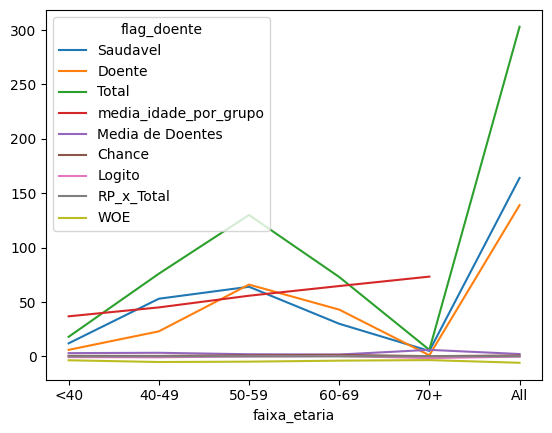

In [33]:
plt = tab_age.plot(kind="line")